# Resumen Estadísticos
## Distribución Normal $N(\mu,\sigma^2)$
### $\mu$ ($\sigma$ conocido y desconocido):

In [2]:
test_norm_mu = function(alpha, tipo, datos, mu0, sigma2){
    if(missing(sigma2)){
        T = normalizar(mean(datos), mu0, var(datos), length(datos))
        
        switch(tipo,
           { # TIPO 1= H1: mu > mu0
               q = -qt(alpha, df=length(datos)-1)
               resultado = (T >= q)
           }, 
           { # TIPO 2= H1: mu < mu0
               q = qt(alpha, df=length(datos)-1)
               resultado = (T <= q)
           }, 
           { # TIPO 3= H1: mu != mu0
               q = -qt(alpha/2, df=length(datos)-1)
               resultado = (abs(T) >= q)
           } 
        )
        
    }else{
        T = normalizar(mean(datos), mu0, sigma2, length(datos))
        
        switch(tipo,
           { # TIPO 1= H1: mu > mu0
               q = -qnorm(alpha)
               resultado = (T >= q)
           }, 
           { # TIPO 2= H1: mu < mu0
               q = qnorm(alpha)
               resultado = (T <= q)
           }, 
           { # TIPO 3= H1: mu != mu0
               q = -qnorm(alpha/2)
               resultado = (abs(T) >= q)
           } 
        )
    }
    resultadoToText(resultado)
}

### $\sigma^2$ ($\mu$ desconocido):

In [30]:
test_norm_sigma2 = function(alpha, tipo, datos, sigma2_0){
    T = (length(datos)-1) * var(datos) / sigma2_0

    switch(tipo,
       { # TIPO 1= H1: mu > mu0
           q = qchisq(alpha, df=length(datos)-1, lower.tail = FALSE)
           resultado = (T >= q)
       }, 
       { # TIPO 2= H1: mu < mu0
           q = qchisq(1-alpha, df=length(datos)-1, lower.tail = FALSE)
           resultado = (T <= q)
       }, 
       { # TIPO 3= H1: mu != mu0
           lower = qchisq(alpha/2, df=length(datos)-1, lower.tail = FALSE)
           upper = qchisq(1-alpha/2, df=length(datos)-1, lower.tail = FALSE)
           
           resultado = (T >= lower || T<= upper)
       } 
    )
    resultadoToText(resultado)
}        

## Distribución Exponencial $\mathcal{E}(\lambda)$

In [4]:
test_exp = function(alpha, tipo, datos, lambda_0){
    T = 2*lambda_0*sum(datos)

    switch(tipo,
       { # TIPO 1= H1: mu > mu0
           q = qchisq(1-alpha, df=2*length(datos), lower.tail = FALSE)
           resultado = (T >= q)
       }, 
       { # TIPO 2= H1: mu < mu0
           q = qchisq(alpha, df=2*length(datos), lower.tail = FALSE)
           resultado = (T <= q)
       }, 
       { # TIPO 3= H1: mu != mu0
           lower = qchisq(alpha/2, df=2*length(datos), lower.tail = FALSE)
           upper = qchisq(1-alpha/2, df=2*length(datos), lower.tail = FALSE)
           
           resultado = (T >= lower || T<= upper)
       } 
    )
    resultadoToText(resultado)
}   

## Tests asintóticos
### Media $\mu$ (varianza desconocida):

In [5]:
test_asint_media = function(alpha, tipo, datos, mu0){
    T = normalizar(mean(datos), mu0, var(datos), length(datos))

    switch(tipo,
       { # TIPO 1= H1: mu > mu0
           q = -qnorm(alpha)
           resultado = (T >= q)
       }, 
       { # TIPO 2= H1: mu < mu0
           q = qnorm(alpha)
           resultado = (T <= q)
       }, 
       { # TIPO 3= H1: mu != mu0
           q = -qnorm(alpha/2)
           resultado = (abs(T) >= q)
       } 
    )
    resultadoToText(resultado)
}

### Distribución Binomial $Bi(1,p)$:

In [6]:
test_binomial = function(alpha, tipo, datos, p0){
    T = normalizar(mean(datos), p0, p0*(1-p0), length(datos))

    switch(tipo,
       { # TIPO 1= H1: mu > mu0
           q = -qnorm(alpha)
           resultado = (T >= q)
       }, 
       { # TIPO 2= H1: mu < mu0
           q = qnorm(alpha)
           resultado = (T <= q)
       }, 
       { # TIPO 3= H1: mu != mu0
           q = -qnorm(alpha/2)
           resultado = (abs(T) >= q)
       } 
    )
    resultadoToText(resultado)
}

### Distribución Poisson $\mathcal{P}(\lambda)$:

In [7]:
test_asint_media = function(alpha, tipo, datos, lambda_0){
    T = normalizar(mean(datos), lambda_0, lambda_0, length(datos))

    switch(tipo,
       { # TIPO 1= H1: mu > mu0
           q = -qnorm(alpha)
           resultado = (T >= q)
       }, 
       { # TIPO 2= H1: mu < mu0
           q = qnorm(alpha)
           resultado = (T <= q)
       }, 
       { # TIPO 3= H1: mu != mu0
           q = -qnorm(alpha/2)
           resultado = (abs(T) >= q)
       } 
    )
    resultadoToText(resultado)
}

# Funciones auxiliares:

In [8]:
resultadoToText = function(res){
    if(res) 'Si, rechazo H0\n' else 'No, no rechazo H0\n'
}

normalizar = function(media, mu, sigma2, n){
    (media-mu) / (sqrt(sigma2 / n))
}

# Ejercicio 1
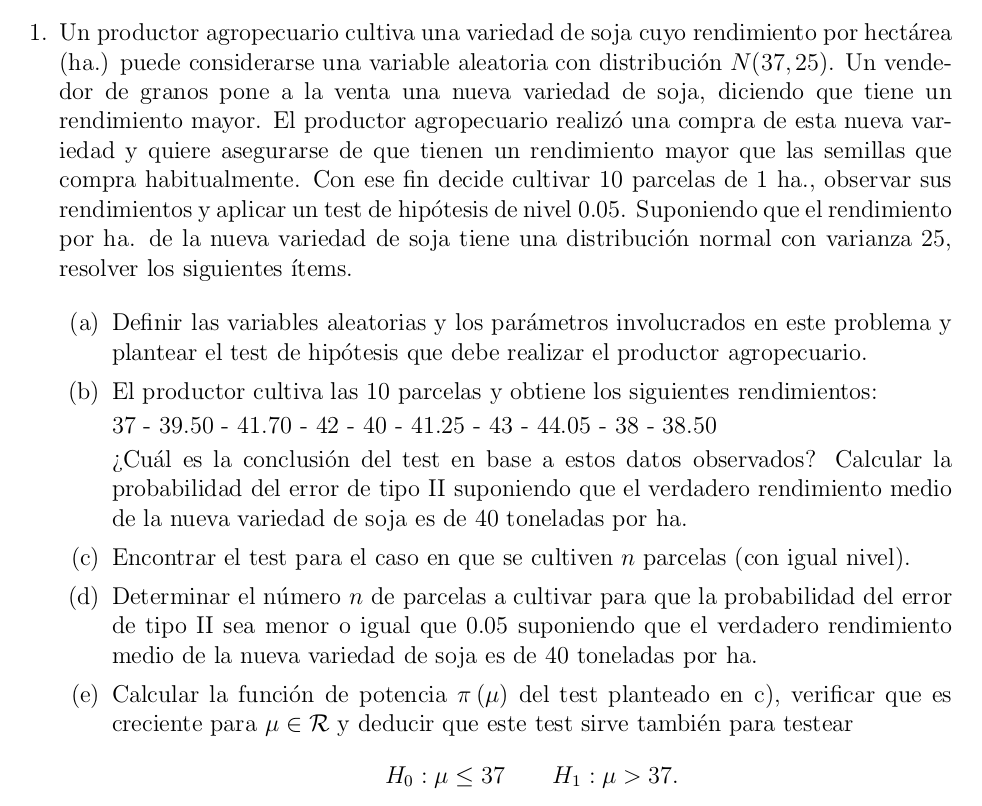

a) 

$X$= rendimiento por ha actual $X$~N(37, 25)

$Y$= rendimiento por ha nueva soja $Y_i$~N($\mu$, 25)

n = 10, nivel = 0.05

$$H_0: \mu=37$$
$$H_1: \mu>37$$

Función de potencia
[video de la clase](https://www.youtube.com/watch?v=nWs6xU7ZP9c&feature=emb_logo)
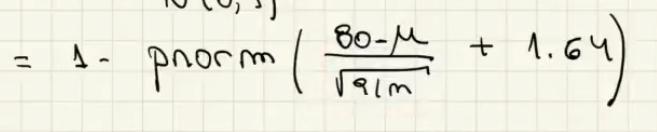

In [61]:
#b)
rendimientos = scan(text='37 39.50 41.70 42 40 41.25 43 44.05 38 38.50')
mu0 = 37
alpha = 0.05
sigma2 = 25
T = normalizar(mean(rendimientos), mu0, sigma2, length(rendimientos))
q = -qnorm(alpha)

cat('b)\nT:', T, '>= Z_alpha:', q, '?\t', resultadoToText(T >= q))

#funcion de potencia
potencia1 = function(mu){
    1-pnorm(q + normalizar(mu0, mu, sigma2, length(rendimientos))) 
}
cat('Prob tipo I (nivel del test):', potencia1(mu0), '\n')

#asumo mu=40 => Y~N(40,25)
mu = 40
cat('Prob tipo II si mu=40:', 1-potencia1(mu))

b)
T: 2.213594 >= Z_alpha: 1.644854 ?	 Si, rechazo H0
Prob tipo I (nivel del test): 0.05 
Prob tipo II si mu=40: 0.4003223

c) ídem a pero n genérico?

d) $$\Phi(1.645 + \frac{37-40}{\sqrt{\frac{25}{n}}}) \leq 0.05$$

$$\Phi(-(1.645 + \frac{37-40}{\sqrt{\frac{25}{n}}})) \geq 0.95$$

$$-1.645 - \frac{37-40}{\sqrt{\frac{25}{n}}} \geq \Phi^{-1}(0.95)$$

$$\frac{3}{5}\sqrt{n} \geq 3.29$$

$$n \geq 30.06$$


In [10]:
#d)
cat('n>=',((-qnorm(0.05) + q) * sqrt(sigma2) / -(mu0-mu))^2)

n>= 30.06159

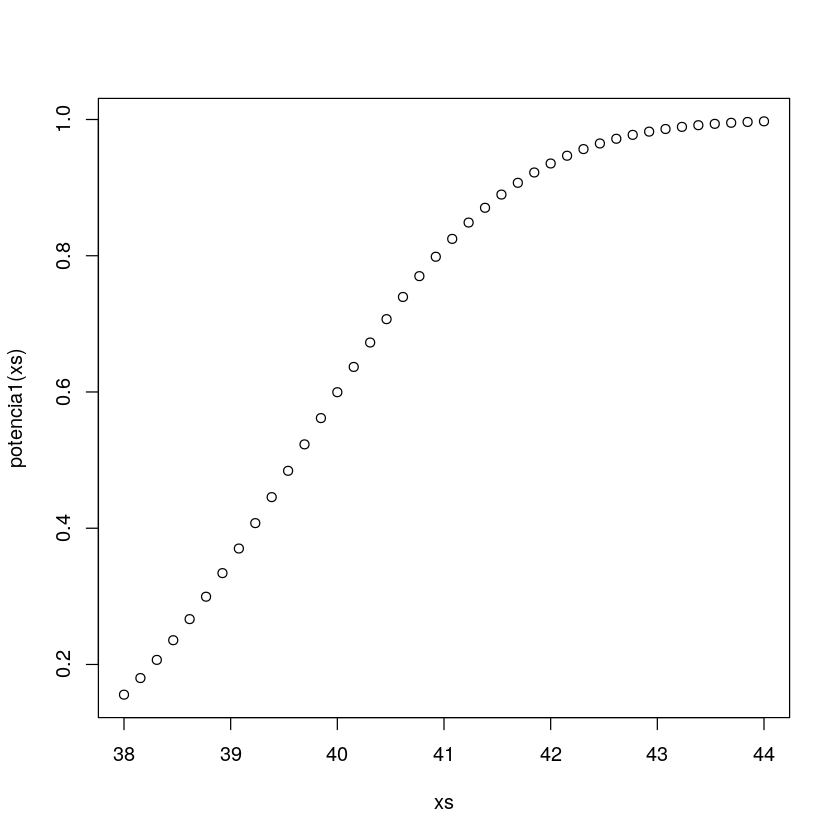

In [11]:
#e)
xs = seq(38, 44, length=40)
plot(xs, potencia1(xs))

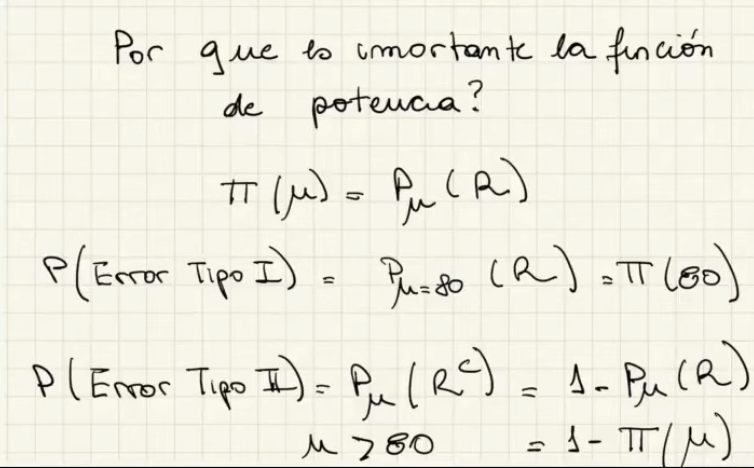

# Ejercicio 2
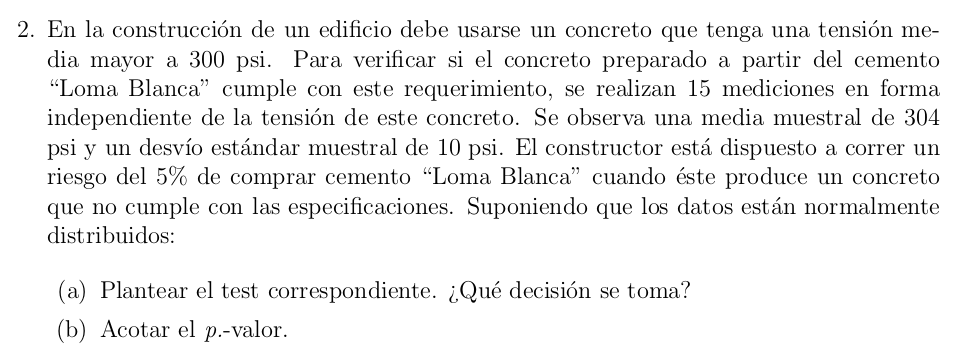

a) 
$$H_0: \mu\leq300 =>\ no\ se\ compra\ el\ cemento$$

$$H_1: \mu>300 =>\ se\ compra\ el\ cemento$$

In [29]:
#a)
alpha = 0.05
mu0 = 300
n=15
media_obs = 304
sigma_obs = 10
T = normalizar(media_obs, mu0, sigma_obs^2, n)
q = -qt(alpha, df=n-1)

cat('a)\nT:', T, '>= Z_alpha:', q, '?\t', resultadoToText(T >= q))

pInf = 1-pnorm(normalizar(media_obs,mu0,sigma_obs^2,n))
pSup = pnorm(normalizar(media_obs,mu0+sigma_obs,sigma_obs^2,n))
cat('b)', pInf, '< p-valor <', pSup,'????!!!')
cat('\n\nb posta) p-valor =', pInf)

a)
T: 1.549193 >= Z_alpha: 1.76131 ?	 No, no rechazo H0
b) 0.06066763 < p-valor < 0.01006838 ????!!!

b posta) p-valor = 0.06066763

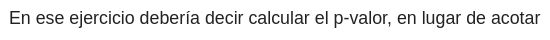

# Ejercicio 3
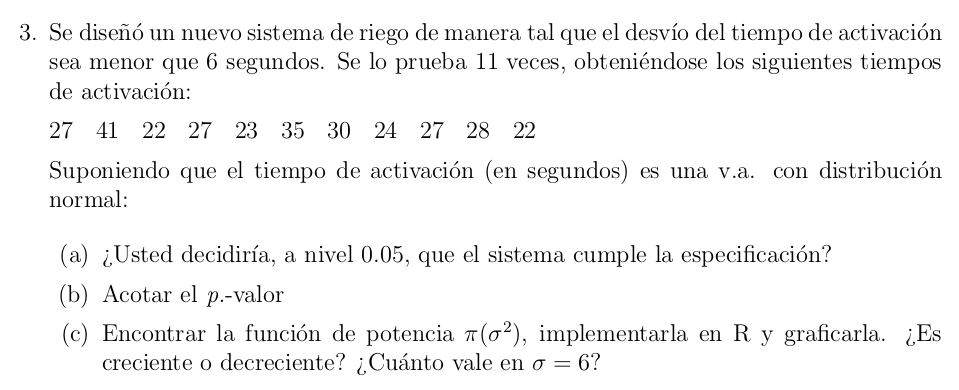

a) el test H0: sigma2=36  H1: sigma2<36 da: No, no rechazo H0
 i.e. no se cumple la especificacion

b) p-valor: 0.5034283 

c) En sigma2=36 vale: 0.1757322

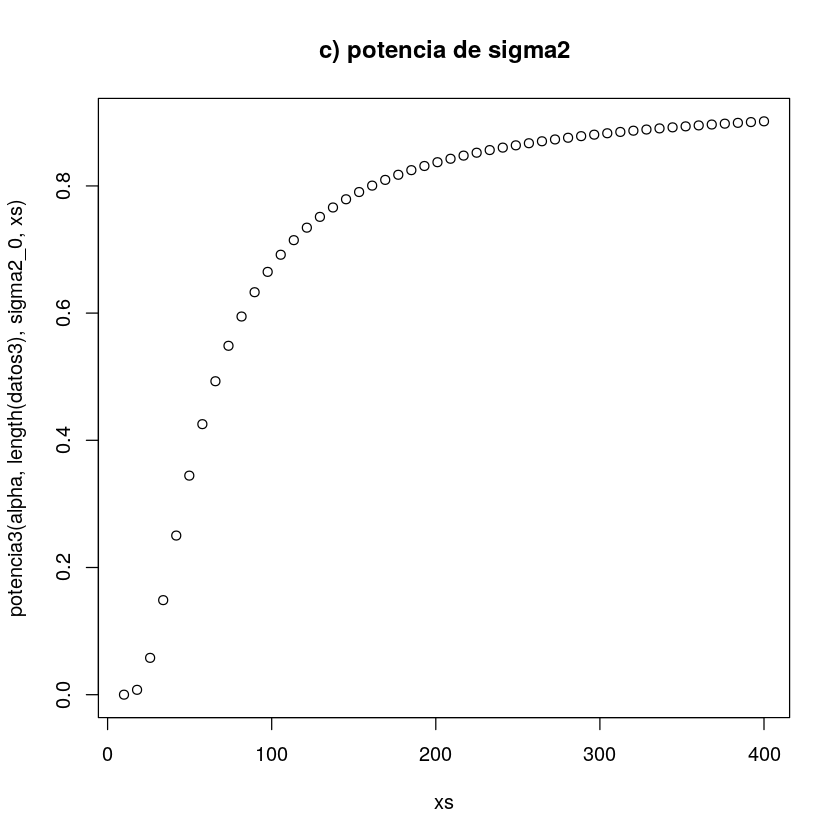

In [77]:
datos3 = scan(text="27 41 22 27 23 35 30 24 27 28 22")
sigma2_0 = 6^2
alpha = 0.05
n=length(datos3)
#a
cat('a) el test H0: sigma2=36  H1: sigma2<36 da:', test_norm_sigma2(alpha, 2, datos3, sigma2_0), 'i.e. no se cumple la especificacion\n\n')

#b
T = (n-1) * var(datos3) / sigma2_0
cat('b) p-valor:', pchisq(T, df=n-1), '\n\n')


#c
potencia3 = function(alpha, n, sigma2_0, sigma2){
    q = qchisq(1-alpha, df=n-1, lower.tail = FALSE)
    1-pchisq(q + (n-1)*sigma2_0/sigma2, df=n-1) ## ok?
}

xs = seq(10, 400, length=50)
plot(xs, potencia3(alpha, length(datos3), sigma2_0, xs), main='c) potencia de sigma2')

cat('c) En sigma2=36 vale:', potencia3(alpha, length(datos3), sigma2_0, sigma2_0))

# Ejercicio 4
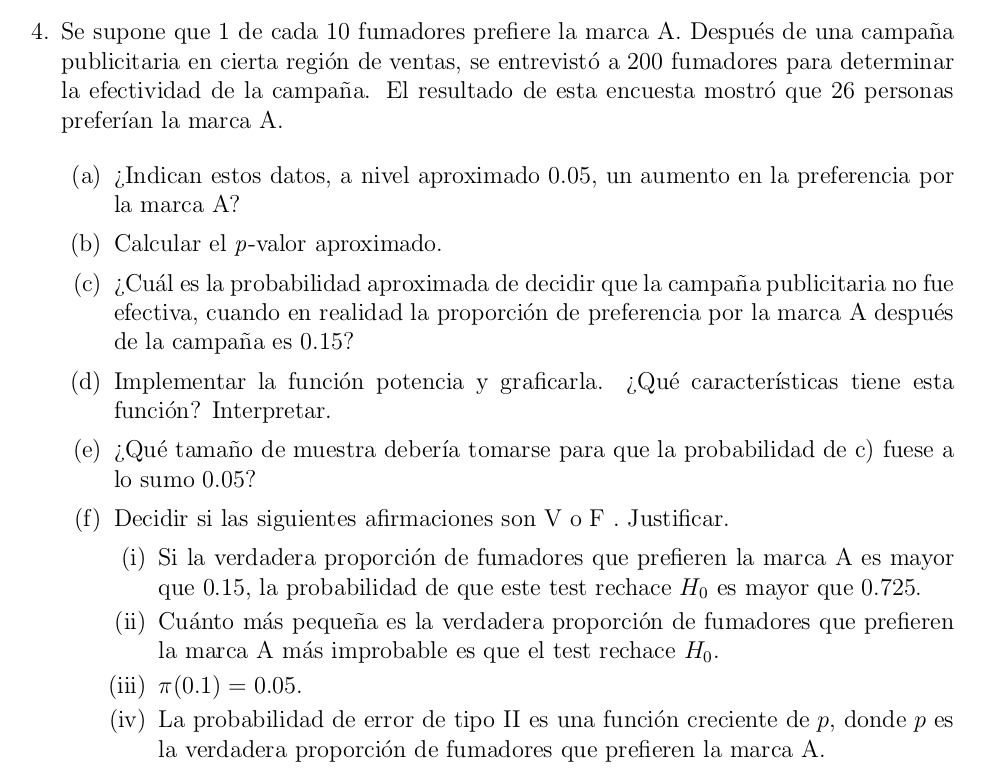

a) H0: p=1/10 H1: p>1/10 da: No, no rechazo H0
 i.e. no hay indicios de aumento de preferencia

b) p-valor: 1.638346e-08

c) P(error tipo II): 0.2381801

d) potencia(1/10): 0.05

e) n>= 389.5983 potencia con n=390: 0.05

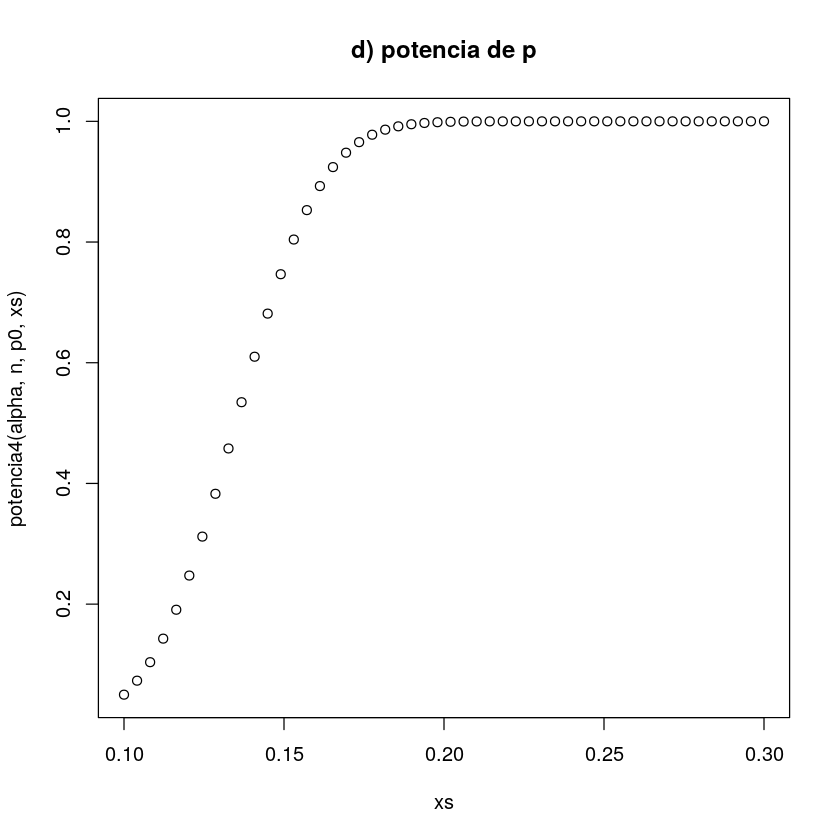

In [80]:
n = 200
p0 = 1/10
p_obs = 26/200

#a # TIPO 1= H1: p > p0
alpha = 0.05
T = normalizar(p_obs, p0, p0*(1-p0), n)
q = -qnorm(alpha)
cat('a) H0: p=1/10 H1: p>1/10 da:',resultadoToText(T >= q), 'i.e. no hay indicios de aumento de preferencia')

#b
cat('\n\nb) p-valor:', pbinom(T, n, p0))

#c y d
potencia4 = function(alpha, n, p0, p){
    q = -qnorm(alpha)
    1-pnorm(q + normalizar(p0, p, p0*(1-p0), n))
}

cat('\n\nc) P(error tipo II):', 1-potencia4(alpha, n, p0, 0.15))

xs = seq(p0, p0+0.2, length=50)
plot(xs, potencia4(alpha, n, p0, xs), main='d) potencia de p')
cat('\n\nd) potencia(1/10):', potencia4(alpha, n, p0, p0))

#e
cat('\n\ne) n>=',((-qnorm(0.05) + q) * sqrt(p0*(1-p0)) / -(p0-0.15))^2, 'potencia con n=390:',potencia4(alpha, 390, p0, p0))

# Ejercicio 5
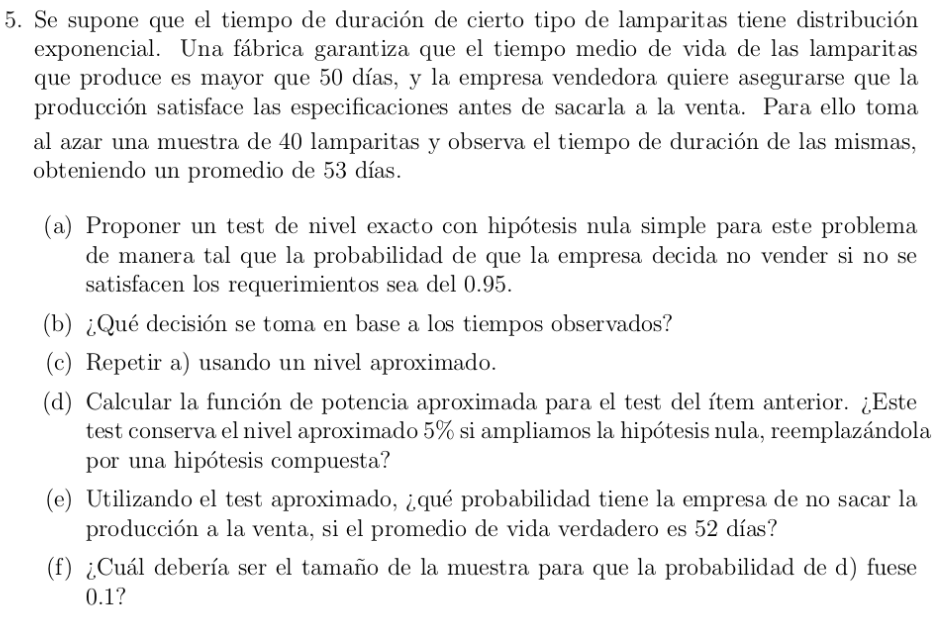

a) 
$$H_0: \frac{1}{\lambda}\leq50 =>\ no\ se\ compran\ las\ lamparitas$$

$$H_1: \frac{1}{\lambda}>50 =>\ se\ compran\ las\ lamparitas$$

In [15]:
#b
lambda_0 = 50
n = 40
media = 53
alpha = 1-0.95

T = 2*lambda_0*(media*n)
q = qchisq(1-alpha, df=2*n, lower.tail = FALSE)
resultado = (T >= q)

cat('b)', resultadoToText(resultado), 'i.e. se compran las lamparitas\n\n')

#c
T = normalizar(media, lambda_0, 1/lambda_0^2, n)
q = -qnorm(alpha)
resultado = (T >= q)
cat('c)', resultadoToText(resultado), 'i.e. se compran las lamparitas')

b) Si, rechazo H0
 i.e. se compran las lamparitas

c) Si, rechazo H0
 i.e. se compran las lamparitas